## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.




In [1]:
source = "amz_uk_price_prediction_dataset.csv"

import pandas as pd
import numpy as np

df = pd.read_csv(source)

In [2]:
df.shape

(2443651, 9)

In [3]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [4]:
# Frequency table for the product category : 

###
# 1 st basic method using value_counts():

df['category'].value_counts()

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: category, Length: 296, dtype: int64

In [5]:
# Frequency table for the product category : 

###
# 2 nd method leveraging matplotlib:

import matplotlib.pyplot as plt 
%matplotlib inline 

fqcy_table = pd.crosstab(df['category'], '% of categories') 
  
# frequency table in proportion of categories 
fqcy_table= fqcy_table/len(df) 
  
fqcy_table

col_0,% of categories
category,
3D Printers,0.000101
3D Printing & Scanning,0.001664
Abrasive & Finishing Products,0.000102
Action Cameras,0.000694
Adapters,0.000104
...,...
Wind Instruments,0.000102
Window Treatments,0.000098
Women,0.007273


In [6]:
# TOP 5 most listed product categories : 

df['category'].value_counts().sort_values(ascending=False)[:5]

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

Text(0, 0.5, 'frequency')

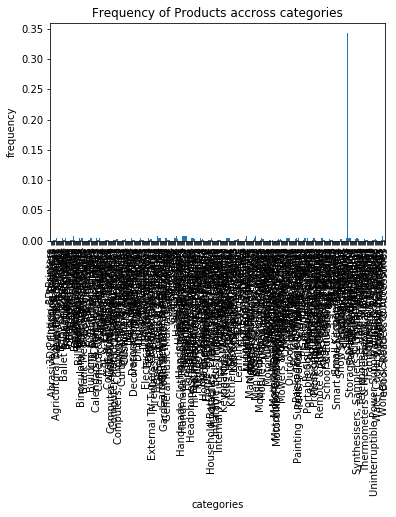

In [7]:
fqcy_table['% of categories'].plot(kind='bar', title='Frequency of Products accross categories')
plt.xlabel('categories')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

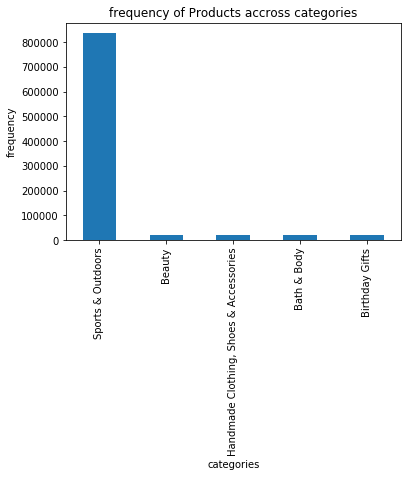

In [8]:
df['category'].value_counts().sort_values(ascending=False)[:5].plot(kind='bar', title='frequency of Products accross categories')
plt.xlabel('categories')
plt.ylabel('frequency')

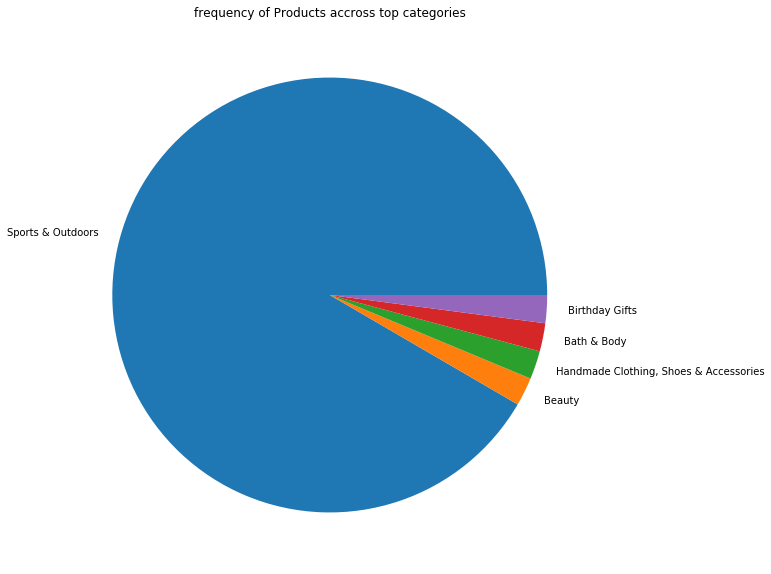

In [9]:
plt.figure(figsize=(10, 10))
plt.pie(df['category'].value_counts().sort_values(ascending=False)[:5], labels = df['category'].value_counts().sort_values(ascending=False)[:5].index)
plt.title('frequency of Products accross top categories')
plt.show()

####  <font color='CornflowerBlue'>The category  <font color='red'>Sports & Outdoors</font> dominates the listing.</font>

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [10]:
# Mean :

round(df['price'].mean(),2)

89.24

In [11]:
# Median :

df['price'].median()


19.09

In [12]:
# Mode :

df['price'].mode()[0]

0    9.99
dtype: float64

####  <font color='CornflowerBlue'>The average price point  <font color='green'>89.24</font> (the mean) is approximately <font color='red'>9 times</font> the most common price point <font color='green'>9.99</font> (the mode).</font>

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [13]:
# Variance :

round(df['price'].var(),2)

119445.49

In [14]:
# Standard Deviation :

round(df['price'].std(),2)

345.61

In [15]:
# Range :

df['price'].max() - df['price'].min()

100000.0

In [16]:
# IQR :

df['price'].quantile([0.25, 0.75])[0.75] - df['price'].quantile([0.25, 0.75])[0.25]

36.0

####  <font color='CornflowerBlue'>The range  of <font color='green'>100 000</font> indicates a <font color='red'>significant spread</font> in prices .</font>

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [17]:
# Mean :

round(df['stars'].mean(),2)

2.15

In [18]:
# Median :

df['stars'].median()

0.0

In [19]:
# Mode :

df['stars'].mode()

0    0.0
dtype: float64

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [20]:
# Variance :

round(df['stars'].var(),2)

4.82

In [21]:
# Standard Deviation :

round(df['stars'].std(),2)

2.19

In [22]:
# IQR :

df['stars'].quantile([0.25, 0.75])[0.75] - df['stars'].quantile([0.25, 0.75])[0.25]

4.4

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [23]:
# kurtosis:

df['stars'].kurtosis()

-1.9260061280432985

In [24]:
# skewness:

df['stars'].skew()

0.08120735761080985

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

Text(0.5, 0, 'Stars')

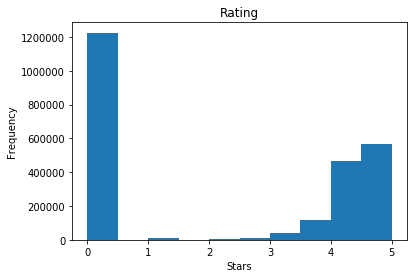

In [25]:
df['stars'].plot(kind='hist', title='Rating')
plt.xlabel('Stars')

####  <font color='CornflowerBlue'>The value of <font color='red'>0</font> seems to be the most common rating. Which is consistent with the mode of <font color='red'>0</font> calculated previously.</font>